# Agent-Based Model: Thomas Schelling's Segregation Model

### Visualizing outcomes for different tolerance thresholds 

With a city that is 50x50 in size, a population that is 40% blue, 20% vacant, and 40% red, and where everyone has the same threshold of tolerance, show an example of what the city looks like after 100,000 moves for each of the different possible tolerance levels, from 0 to 8. 

In 1971 Thomas Schelling published “Dynamic Models of Segregation,” which proposes a simple model of racial segregation. The Schelling model of the world is a grid; each cell represents a house. The houses are occupied by two kinds of “agents,” labeled red and blue, in roughly equal numbers. About 10% of the houses are empty.

At any point in time, an agent might be happy or unhappy, depending on the other agents in the neighborhood. The neighborhood of each house is the set of eight adjacent cells. In one version of the model, agents are happy if they have at least two neighbors like themselves, and unhappy if they have one or zero.

The simulation proceeds by choosing an agent at random and checking to see whether it is happy. If so, then nothing happens; if not, the agent chooses one of the unoccupied cells at random and moves.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class City():

    def __init__(self, size, proportions, threshold):
        self.size = size        
        self.pop = np.random.choice([-1,0,1],p=proportions,size=(size,size))
        self.threshold = threshold
        
    def show(self):
        plt.imshow(self.pop, interpolation="nearest", cmap="bwr")
        plt.xticks([])
        plt.yticks([])
        plt.show()        
        
    def step(self):
        # pick random house
        i,j = self.randomHouse()
        # find a place to move to if it's unhappy
        if self.numberKin(i,j) < self.threshold:
            self.move(i,j)        
        
    def numberKin(self, i, j):
        return np.count_nonzero(self.pop[i-1:i+2,j-1:j+2]==self.pop[i,j])-1

    def move(self, i, j):
        newi,newj = self.randomVacant()
        self.pop[newi][newj] = self.pop[i][j]
        self.pop[i][j] = 0
        
    def randomHouse(self):
        found = False
        while not found:
            i = np.random.randint(1,self.size-1)
            j = np.random.randint(1,self.size-1)
            if self.pop[i][j] != 0:
                found = True
        return i, j

    def randomVacant(self):
        np.where(self.pop==0)
        found = False
        while not found:
            i = np.random.randint(1,self.size-1)
            j = np.random.randint(1,self.size-1)
            if self.pop[i][j] == 0:
                found = True
        return i, j
    
    def numberNeighbors(self, i, j):
        return np.count_nonzero(self.pop[i-1:i+2,j-1:j+2]!=0)-1    

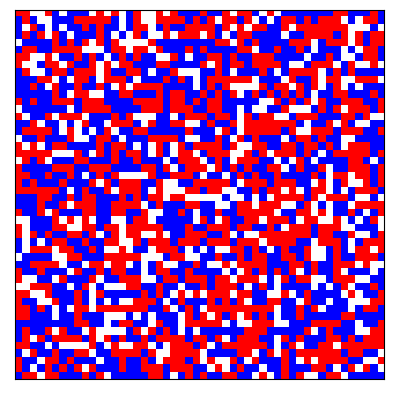

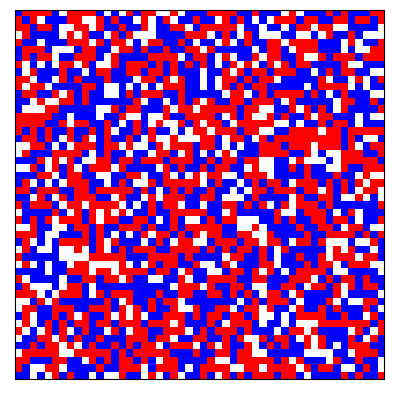

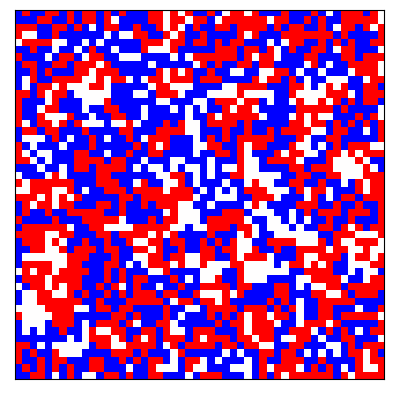

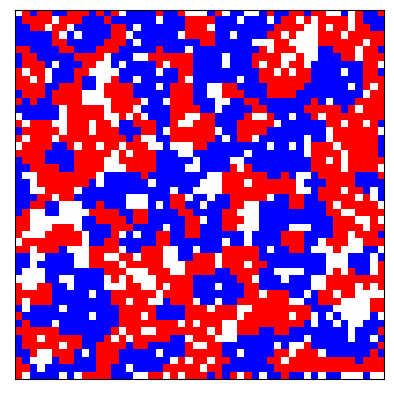

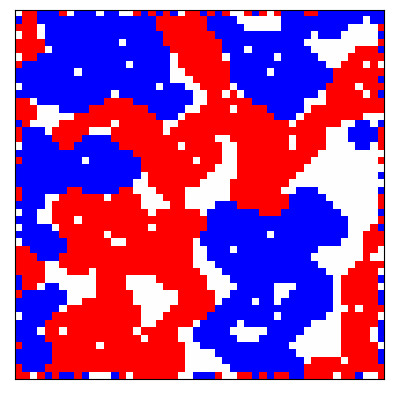

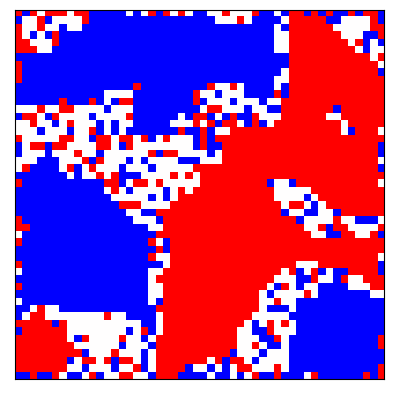

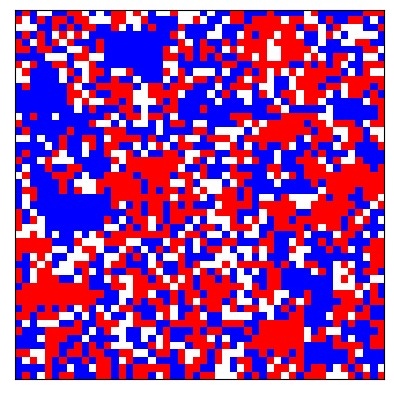

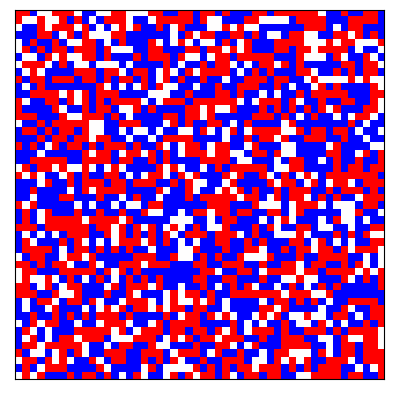

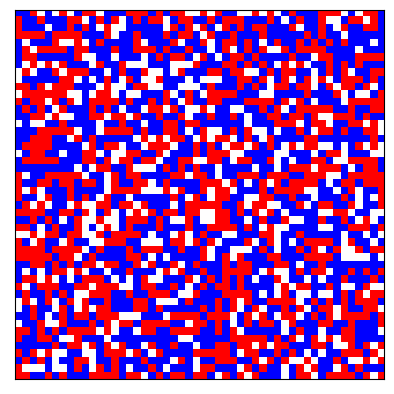

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class City():

    def __init__(self, size, proportions, threshold):
        self.size = size        
        self.pop = np.random.choice([-1,0,1],p=proportions,size=(size,size))
        self.threshold = threshold
        
    def show(self):
        plt.imshow(self.pop, interpolation="nearest", cmap="bwr")
        plt.xticks([])
        plt.yticks([])
        plt.show()        
        
    def step(self):
        # pick random house
        i,j = self.randomHouse()
        # find a place to move to if it's unhappy
        if self.numberKin(i,j) < self.threshold:
            self.move(i,j)        
        
    def numberKin(self, i, j):
        return np.count_nonzero(self.pop[i-1:i+2,j-1:j+2]==self.pop[i,j])-1

    def move(self, i, j):
        newi,newj = self.randomVacant()
        self.pop[newi][newj] = self.pop[i][j]
        self.pop[i][j] = 0
        
    def randomHouse(self):
        found = False
        while not found:
            i = np.random.randint(1,self.size-1)
            j = np.random.randint(1,self.size-1)
            if self.pop[i][j] != 0:
                found = True
        return i, j

    def randomVacant(self):
        np.where(self.pop==0)
        found = False
        while not found:
            i = np.random.randint(1,self.size-1)
            j = np.random.randint(1,self.size-1)
            if self.pop[i][j] == 0:
                found = True
        return i, j
    
    def numberNeighbors(self, i, j):
        return np.count_nonzero(self.pop[i-1:i+2,j-1:j+2]!=0)-1

def simulation(threshold):
    city1 = City(50, [0.4, 0.2, 0.4], threshold)
    for i in range(100000):
        city1.step()
    city1.show()

for threshold in range(9):
    simulation(threshold)
    
# Interpretation
# 0 - City is completly random and desegregated
# 1 - People begin to move towards their own kind, city is still fairly desegregated
# 2 - People continue to move and the city becomes even more segregated but is still fairly mixed
# 3 - City is very segregated at this point but there are still some areas where the population is mixed
# 4 - City is almost completly segregated with very little mixed colors
# 5 - As the threshold increases, less segregation occurs which is causing a more diverse color profile
# 6-7 - People are continuing to become more tolerant and desegregation is occuring
# 8 - Completly randomized similar to 0


### Define a Segregation Index

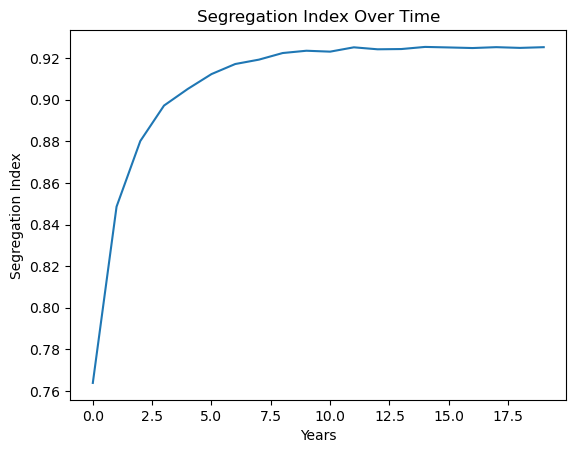

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class City():

    def __init__(self, size, proportions, threshold):
        self.size = size        
        self.pop = np.random.choice([-1,0,1],p=proportions,size=(size,size))
        self.threshold = threshold
        self.segregation_history = []  # list to store the segregation index at each year
        self.move_count = 0

    def show(self):
        plt.imshow(self.pop, interpolation="nearest", cmap="bwr")
        plt.xticks([])
        plt.yticks([])
        plt.show()        
        
    def step(self):
        # pick random house
        i,j = self.randomHouse()
        # find a place to move to if it's unhappy
        if self.numberKin(i,j) < self.threshold:
            self.move(i,j) 
        self.move_count += 1
        if self.move_count % 5000 == 0:  # calculate segregation index every 5000 moves
            self.calculateSegregationIndex()

    def calculateSegregationIndex(self):
        # calculate the segregation index as the proportion of neighbors that are the same color
        # initialize 3 arrays with the same dimentions
        red_neighbors = np.zeros_like(self.pop)
        blue_neighbors = np.zeros_like(self.pop)
        total_neighbors = np.zeros_like(self.pop)
        # Loop through each house in the pupulation array and keeps track of the amount of neighboring same and opposite
        # color houses as time goes on and attributes either +1 or -1
        for i in range(1, self.size-1):
            for j in range(1, self.size-1):
                if self.pop[i][j] != 0:
                    neighbors = self.pop[i-1:i+2,j-1:j+2]
                    total_neighbors[i][j] = np.count_nonzero(neighbors)
                    red_neighbors[i][j] = np.count_nonzero(neighbors == 1)
                    blue_neighbors[i][j] = np.count_nonzero(neighbors == -1)
        # The segregation index is then calculated by summing the same_neighbors array and dividing by the sum of the total_neighbors array. 
        # The resulting value is appended to the segregation_history list.
        same_neighbors = np.where(self.pop == 1, red_neighbors, blue_neighbors)
        segregation_index = np.sum(same_neighbors) / np.sum(total_neighbors)
        self.segregation_history.append(segregation_index)

    def numberKin(self, i, j):
        return np.count_nonzero(self.pop[i-1:i+2,j-1:j+2]==self.pop[i,j])-1

    def move(self, i, j):
        newi,newj = self.randomVacant()
        self.pop[newi][newj] = self.pop[i][j]
        self.pop[i][j] = 0
        
    def randomHouse(self):
        found = False
        while not found:
            i = np.random.randint(1,self.size-1)
            j = np.random.randint(1,self.size-1)
            if self.pop[i][j] != 0:
                found = True
        return i, j

    def randomVacant(self):
        np.where(self.pop==0)
        found = False
        while not found:
            i = np.random.randint(1,self.size-1)
            j = np.random.randint(1,self.size-1)
            if self.pop[i][j] == 0:
                found = True
        return i, j
    
    def numberNeighbors(self, i, j):
        return np.count_nonzero(self.pop[i-1:i+2,j-1:j+2]!=0)

city = City(50, [0.4, 0.2, 0.4], 4)
for i in range(100000):
    city.step()

plt.plot(city.segregation_history)
plt.xlabel("Years")
plt.ylabel("Segregation Index")
plt.title("Segregation Index Over Time")
plt.show()

# Interpretation: 
# The results show that the segregation index inclines steeply for about 7.5 years and remains fairly consistent only raising my a small margin
# This is because at the beginning, people are more inclined to move since their threshold of happiness has not been met but as time goes on, they become more satisfied with their situation. 

### Compare the Final Segregation Indices across different Tolerance Thresholds

Year:  1  Threshold:  0
Year:  2  Threshold:  0
Year:  3  Threshold:  0
Year:  4  Threshold:  0
Year:  5  Threshold:  0
Year:  6  Threshold:  0
Year:  7  Threshold:  0
Year:  8  Threshold:  0
Year:  9  Threshold:  0
Year:  10  Threshold:  0
Year:  11  Threshold:  0
Year:  12  Threshold:  0
Year:  13  Threshold:  0
Year:  14  Threshold:  0
Year:  15  Threshold:  0
Year:  16  Threshold:  0
Year:  17  Threshold:  0
Year:  18  Threshold:  0
Year:  19  Threshold:  0
Year:  20  Threshold:  0
Year:  1  Threshold:  1
Year:  2  Threshold:  1
Year:  3  Threshold:  1
Year:  4  Threshold:  1
Year:  5  Threshold:  1
Year:  6  Threshold:  1
Year:  7  Threshold:  1
Year:  8  Threshold:  1
Year:  9  Threshold:  1
Year:  10  Threshold:  1
Year:  11  Threshold:  1
Year:  12  Threshold:  1
Year:  13  Threshold:  1
Year:  14  Threshold:  1
Year:  15  Threshold:  1
Year:  16  Threshold:  1
Year:  17  Threshold:  1
Year:  18  Threshold:  1
Year:  19  Threshold:  1
Year:  20  Threshold:  1
Year:  1  Threshol

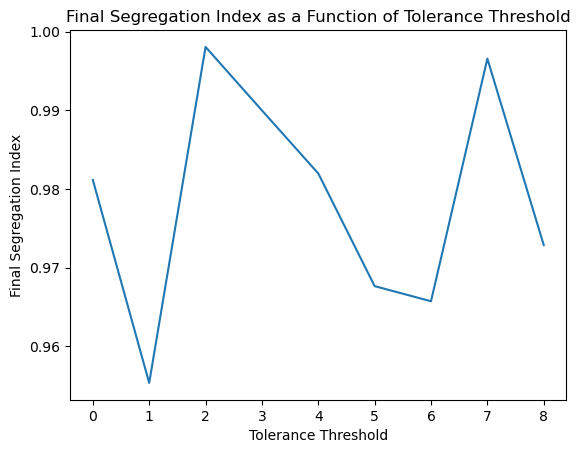

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class City():

    def __init__(self, size, proportions, threshold):
        self.size = size        
        self.pop = np.random.choice([-1,0,1],p=proportions,size=(size,size))
        self.threshold = threshold
        
    def show(self):
        plt.imshow(self.pop, interpolation="nearest", cmap="bwr")
        plt.xticks([])
        plt.yticks([])
        plt.show()        
        
    def step(self):
        # pick random house
        i,j = self.randomHouse()
        # find a place to move to if it's unhappy
        if self.numberKin(i,j) < self.threshold:
            self.move(i,j)        
        
    def numberKin(self, i, j):
        return np.count_nonzero(self.pop[i-1:i+2,j-1:j+2]==self.pop[i,j])-1

    def move(self, i, j):
        newi,newj = self.randomVacant()
        self.pop[newi][newj] = self.pop[i][j]
        self.pop[i][j] = 0
        
    def randomHouse(self):
        found = False
        while not found:
            i = np.random.randint(1,self.size-1)
            j = np.random.randint(1,self.size-1)
            if self.pop[i][j] != 0:
                found = True
        return i, j

    def randomVacant(self):
        np.where(self.pop==0)
        found = False
        while not found:
            i = np.random.randint(1,self.size-1)
            j = np.random.randint(1,self.size-1)
            if self.pop[i][j] == 0:
                found = True
        return i, j
    
    def numberNeighbors(self, i, j):
        return np.count_nonzero(self.pop[i-1:i+2,j-1:j+2]!=0)-1    
    
    def segregationIndex(self):
        red = np.count_nonzero(self.pop == 1)
        blue = np.count_nonzero(self.pop == -1)
        return 1 - (np.abs(red - blue) / (red + blue + 0.0001))
        

size = 50
proportions = [0.4,0.2,0.4]
duration = 100000
num_years = 20
thresholds = list(range(9))

final_segregation = []
for t in thresholds:
    city = City(size, proportions, t)
    for i in range(duration):
        city.step()
        if i % 5000 == 0:
            print("Year: ", int(i / 5000) + 1, " Threshold: ", t)
    final_segregation.append(city.segregationIndex())

plt.plot(thresholds, final_segregation)
plt.xlabel("Tolerance Threshold")
plt.ylabel("Final Segregation Index")
plt.title("Final Segregation Index as a Function of Tolerance Threshold")
plt.show()

# Interpretation: 
# The graph shows a very erratic pattern of segregation which is probably due to happiness thresholds being constantly validated and invalidated.


### Question #4: Role of Vacancy on Segregation

Now that your segregation index works well, let's ask more questions about this model to understand it better. 

For example, let's try to better understand the role of vacant homes on the segregation outcome of a city: Hoes does vacancy affect the final segregation threshold of the city? 

To answer this question, pick a threshold (let's say 4) and keep it fixed, keep all other hyperparameters also fixed (size of the city, proportion of red/blue equal, duration), and instead vary the proportion of vacancies systematically from say 0.1 to 0.9, in steps of 0.1 (so  0.1, 0.2, .. 0.8, 0.9).

As with the previous experiment, you will have to be patient for the final outcome, which should take around 20-30 seconds. But also, keep in mind that while you are debugging (before you know you've got things working), you can also make the problem simpler (smaller city, shorter duration). Once you've got it to work, then you can do the final experiment with the final hyperparameters. 

Make sure you make a hypothesis and even write it down, before you run your experiment. Does more vacancy make segregation more or less likely? Did what you think would happen happened? Explain whether your prediction matched the results. Interpret your results. 

Year:  1  Threshold:  0
Year:  2  Threshold:  0
Year:  3  Threshold:  0
Year:  4  Threshold:  0
Year:  5  Threshold:  0
Year:  6  Threshold:  0
Year:  7  Threshold:  0
Year:  8  Threshold:  0
Year:  9  Threshold:  0
Year:  10  Threshold:  0
Year:  11  Threshold:  0
Year:  12  Threshold:  0
Year:  13  Threshold:  0
Year:  14  Threshold:  0
Year:  15  Threshold:  0
Year:  16  Threshold:  0
Year:  17  Threshold:  0
Year:  18  Threshold:  0
Year:  19  Threshold:  0
Year:  20  Threshold:  0
Year:  1  Threshold:  1
Year:  2  Threshold:  1
Year:  3  Threshold:  1
Year:  4  Threshold:  1
Year:  5  Threshold:  1
Year:  6  Threshold:  1
Year:  7  Threshold:  1
Year:  8  Threshold:  1
Year:  9  Threshold:  1
Year:  10  Threshold:  1
Year:  11  Threshold:  1
Year:  12  Threshold:  1
Year:  13  Threshold:  1
Year:  14  Threshold:  1
Year:  15  Threshold:  1
Year:  16  Threshold:  1
Year:  17  Threshold:  1
Year:  18  Threshold:  1
Year:  19  Threshold:  1
Year:  20  Threshold:  1
Year:  1  Threshol

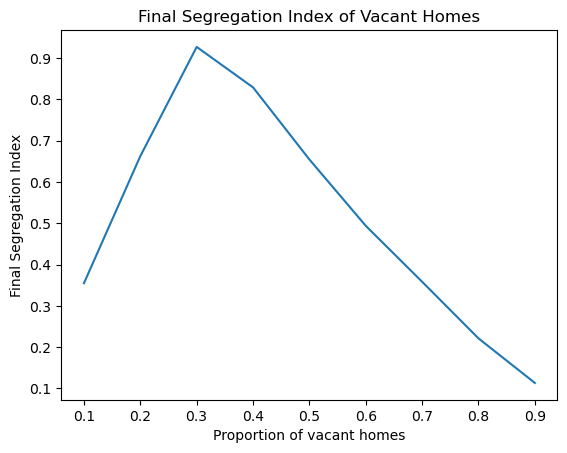

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Hypothesis: More vacant homes will lead to less segregation since it is less likely to have a neighbor that is of the opposite color

class City():

    def __init__(self, size, proportions, threshold):
        self.size = size        
        self.pop = np.random.choice([-1,0,1],p=proportions,size=(size,size))
        self.threshold = threshold
        
    def show(self):
        plt.imshow(self.pop, interpolation="nearest", cmap="bwr")
        plt.xticks([])
        plt.yticks([])
        plt.show()        
        
    def step(self):
        # pick random house
        i,j = self.randomHouse()
        # find a place to move to if it's unhappy
        if self.numberKin(i,j) < self.threshold:
            self.move(i,j)        
        
    def numberKin(self, i, j):
        return np.count_nonzero(self.pop[i-1:i+2,j-1:j+2]==self.pop[i,j])-1

    def move(self, i, j):
        newi,newj = self.randomVacant()
        self.pop[newi][newj] = self.pop[i][j]
        self.pop[i][j] = 0
        
    def randomHouse(self):
        found = False
        while not found:
            i = np.random.randint(1,self.size-1)
            j = np.random.randint(1,self.size-1)
            if self.pop[i][j] != 0:
                found = True
        return i, j

    def randomVacant(self):
        np.where(self.pop==0)
        found = False
        while not found:
            i = np.random.randint(1,self.size-1)
            j = np.random.randint(1,self.size-1)
            if self.pop[i][j] == 0:
                found = True
        return i, j
    
    def numberNeighbors(self, i, j):
        return np.count_nonzero(self.pop[i-1:i+2,j-1:j+2]!=0)-1    
    
    def segregationIndex(self):
        red = np.count_nonzero(self.pop == 1)
        blue = np.count_nonzero(self.pop == -1)
        return 1 - (np.abs(red - blue) / (red + blue + 0.0001))
        

size = 50
proportions = [0.4,0.2,0.4]
duration = 100000
num_years = 20
thresholds = list(range(9))

final_segregation = []
for t in thresholds:
    city = City(size, proportions, t)
    for i in range(duration):
        city.step()
        if i % 5000 == 0:
            print("Year: ", int(i / 5000) + 1, " Threshold: ", t)
    final_segregation.append(city.segregationIndex())

size = 50
proportions = [0.5, 0.5, 0.0] # Equal proportions of red and blue, no vacant homes
duration = 100000
threshold = 4
vacancies = np.arange(0.1, 1.0, 0.1)
final_segregation = []

for v in vacancies:
    proportions = [0.5*(1-v), 0.5*(1-v), v] # Update proportions to include vacancy
    city = City(size, proportions, threshold)
    for i in range(duration):
        city.step()
    final_segregation.append(city.segregationIndex())
    
plt.plot(vacancies, final_segregation)
plt.xlabel("Proportion of vacant homes")
plt.ylabel("Final Segregation Index")
plt.title("Final Segregation Index of Vacant Homes")
plt.show()

# Interpretation: My hypothesis was mostly correct in saying more vacant homes will lead to a lower segregation index. 
# But, I failed to take into account a lower than peak level of segregation from 0.0-0.3 since there was not much room for people to move. 

### Question #5: Open ended. 

Select one way to extend/modify the model. Find a question to ask about the model (like the questions before this one). Answer your question with an experiment and visualize it with a figure. Interpret and discuss your results. 

Note: There are lots of really cool ideas and questions that you can explore here. It's Okay if you are having trouble coming up with one, just bring it up with us and we can help! 

Some potential questions of interest: 
- So far, we have only considered segregation where everyone has the same threshold of tolerance. But what happens to the results that we have studied so far when blue and green households have different happiness thresholds? 
- So far, we have only considered segregation in cities with the same proportion of blue and red households. What happens to the level of segregation in a city with unequal proportions of blue and green households? 
- So far, people select new homes at random. What if this heuristic changes, and people select houses that meet their tolerance criteria? Or some other criteria? 
- So far, we have only considered cities with two "types" of people (blue and red). Does segregation become better or worst when there are three "types"? 

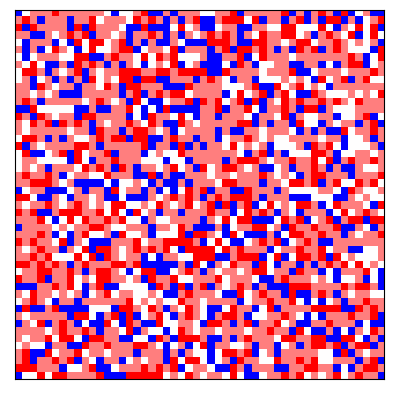

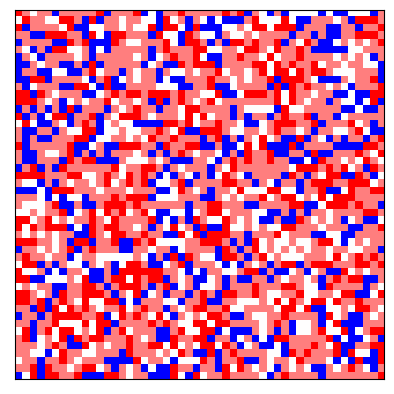

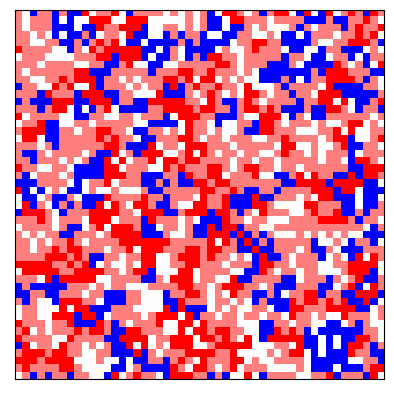

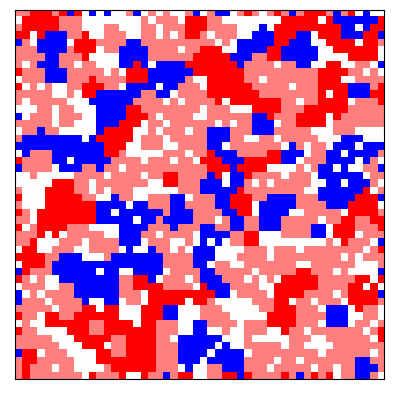

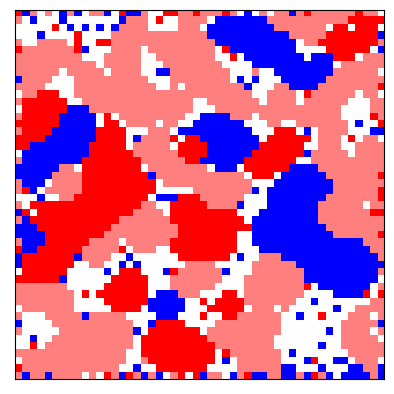

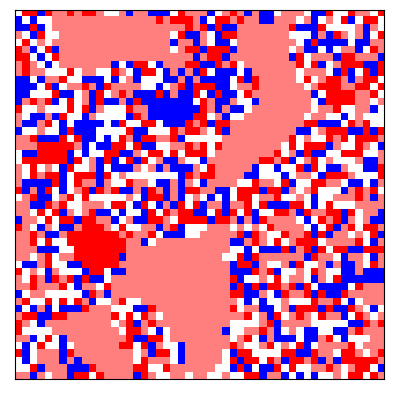

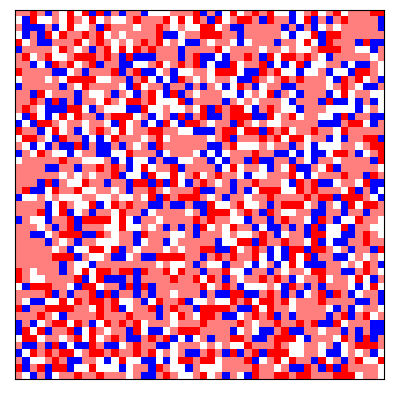

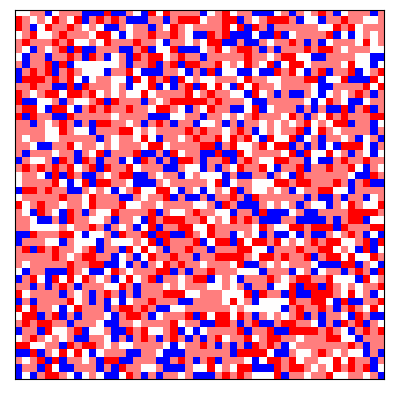

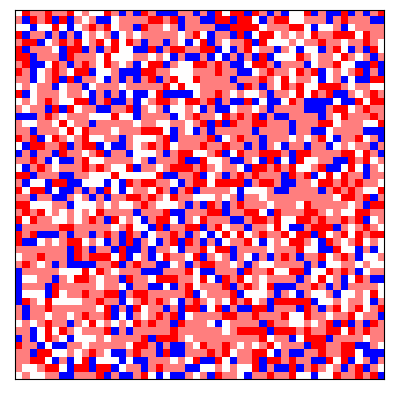

In [16]:
import numpy as np
import matplotlib.pyplot as plt


# QUESTION: What happens if you add a 3rd color into problem 1? How would this effect the distribution?


class City():

    def __init__(self, size, proportions, threshold):
        self.size = size        
        self.pop = np.random.choice([-1,0.5,0,0.5,1],p=proportions,size=(size,size))
        self.threshold = threshold
        
    def show(self):
        plt.imshow(self.pop, interpolation="nearest", cmap="bwr")
        plt.xticks([])
        plt.yticks([])
        plt.show()        
        
    def step(self):
        # pick random house
        i,j = self.randomHouse()
        # find a place to move to if it's unhappy
        if self.numberKin(i,j) < self.threshold:
            self.move(i,j)        
        
    def numberKin(self, i, j):
        return np.count_nonzero(self.pop[i-1:i+2,j-1:j+2]==self.pop[i,j])-1

    def move(self, i, j):
        newi,newj = self.randomVacant()
        self.pop[newi][newj] = self.pop[i][j]
        self.pop[i][j] = 0
        
    def randomHouse(self):
        found = False
        while not found:
            i = np.random.randint(1,self.size-1)
            j = np.random.randint(1,self.size-1)
            if self.pop[i][j] != 0:
                found = True
        return i, j

    def randomVacant(self):
        np.where(self.pop==0)
        found = False
        while not found:
            i = np.random.randint(1,self.size-1)
            j = np.random.randint(1,self.size-1)
            if self.pop[i][j] == 0:
                found = True
        return i, j
    
    def numberNeighbors(self, i, j):
        return np.count_nonzero(self.pop[i-1:i+2,j-1:j+2]!=0)-1

def simulation(threshold):
    city1 = City(50, [0.2, 0.2, 0.2, 0.2, 0.2], threshold)
    for i in range(100000):
        city1.step()
    city1.show()

for threshold in range(9):
    simulation(threshold)
    
# Interpretation - As we can see from the graph, the distribution of segregation remained the same as with 2 colors
# it just made it more complicated. Nonetheless, it remained very randomized at the beginning, very segregated in the middle, and radomized at the end